In [2]:
# Run this in Python once, it should take effect permanently
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [1]:
#Imports
import os
from os import path

# Imports url
import urllib.request
from bs4 import BeautifulSoup
import html2text

#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

#Plot
import matplotlib.pyplot as plt


## Read in the html page of the Friends episode transcripts

In [2]:
path = './season/'
filename = '0101.html'

def open_html(filename_html):
    '''
    Import html screenplay file.
    
    Parameters:
    ----------
    filename_html - String. File name.
    
    Return:
    ------
    File.
    
    '''
    
    filename = path+filename_html
    
    f = open(filename, 'r').read()
    #print(f)
    return f

#filename = './season/0101.html'
#f = open(filename, "r").read()
#print(f)

In [3]:
f = open_html(filename)

## Convert html into readable text using html2text

In [4]:
def convert_html_to_text(file):
    '''
    Convert html file into text file. 
    
    Parameters:
    ----------
    file - Html file. 
    
    Return:
    ------
    episode - txt file, converted from html.
    '''
    
    h = html2text.HTML2Text()
    # Ignore converting links from HTML
    h.ignore_links = True
    print(h.handle(file))
    episode = h.handle(file)
    return episode

In [5]:
first_episode = convert_html_to_text(f)

# The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)

* * *

Written by: Marta Kauffman & David Crane  
Transcribed by: guineapig  
Additional transcribing by: Eric Aasen  
(Note: The previously unseen parts of this episode are shown in blue text.)

* * *

**

** [Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]

**Monica:** There's nothing to tell! He's just some guy I work with!

**Joey:** C'mon, you're going out with the guy! There's gotta be something
wrong with him!

**Chandler:** All right Joey, be nice.  So does he have a hump? A hump and a
hairpiece?

**Phoebe:** Wait, does he eat chalk?

(They all stare, bemused.)

**Phoebe:** Just, 'cause, I don't want her to go through what I went through
with Carl- oh!

**Monica:** Okay, everybody relax. This is not even a date. It's just two
people going out to dinner and- not having sex.

**Chandler:** Sounds like a date to me.

[Time Lapse]

**Chandler:** Alright, so I'm back in high school, I'm sta

In [6]:
def add_stopwords_to_wordcloud(stop_friends_on_off):
    '''
    Set on and off stopwords - whether to use Friends names or not. If 'True' it will add Friends names to stopwords.
    
    Parameters:
    ----------
    stop_friends_on_off - True/False statement.
    
    Return:
    ------
    stopwords - list of the used stopwords.
    '''
    
    stopwords = set(STOPWORDS)

    stopwords.add("Scene")

    # Need to add stopwords for Frinds if I don't want to show their names
    stop_friends = stop_friends_on_off

    if stop_friends == True:
        stopwords.add("Monica")
        stopwords.add("Rachel")
        stopwords.add("Ross")
        stopwords.add("Phoebe")
        stopwords.add("Chandler")
        stopwords.add("Joey")
        print('Friends names will be excluded.')
    else:
        print('Firends names will be included.')
    
    return stopwords

In [16]:
stopwords = add_stopwords_to_wordcloud(False);

Firends names will be included.


In [17]:
max_font_size = 100
min_font_size = 3
bck_color = 'black'
#width = 500
#height = 300
width=1600
height=800
colourmap = plt.cm.cividis_r
relative_scaling = 0

def generate_wordcloud_bilinear(episode, max_font_size ):
    '''
    Make a wordcloud based on the episode. Use bilinear interpolation and max font size.
    
    Parametes:
    ---------
    episode - txt of the loaded episode.
    font_size - Integer. Maximum font size used on the image.
    
    Return:
    ------
    Makes a wordcloud and plots it.
    '''
    
    # lower max_font_size
    wordcloud = WordCloud(width=width, height=height, background_color=bck_color, 
                          max_font_size=max_font_size, stopwords=stopwords, colormap = colourmap,
                         relative_scaling=relative_scaling).generate(episode)
    
    
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

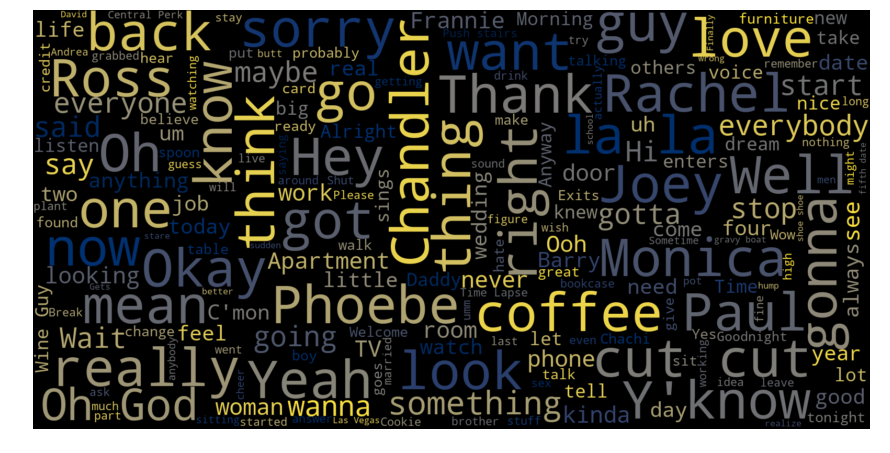

In [18]:
generate_wordcloud_bilinear(first_episode, max_font_size)

In [24]:
mask_image = 'friends_couch.jpg'

def generate_wordcloud_with_mask(mask_image, episode):
    '''
    Make a wordcloud using image as a mask.
    
    Parameters:
    ----------
    mask_image - Image. Used as a mask.
    episode - txt file. 
    
    Return:
    ------
    Saves wordcloud figure and plots the output.
    '''

    friends_mask = np.array(Image.open(mask_image))

    wc = WordCloud(width=width, height=height, background_color="white", max_words=2000, mask=friends_mask,
               stopwords=stopwords, contour_width=2, min_font_size=min_font_size, contour_color='grey', 
                  colormap = colourmap).generate(episode)

    # store to file
    wc.to_file("F.png")
    # show
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

    plt.show()
    return

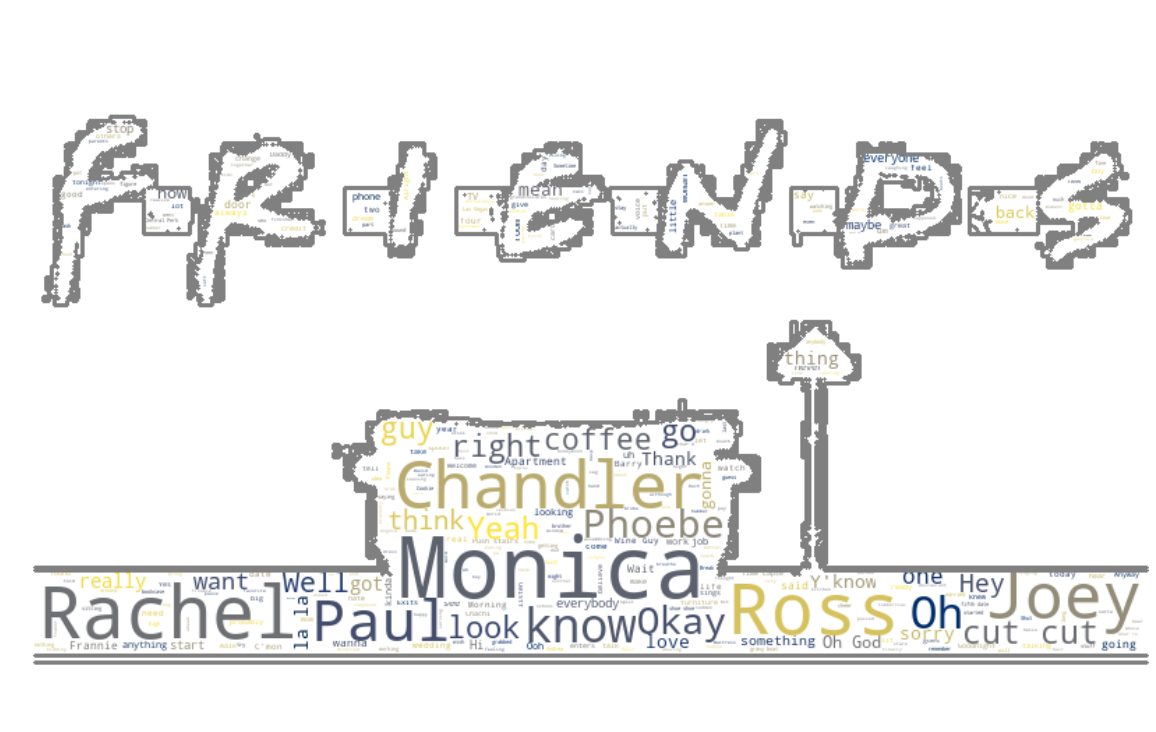

In [25]:
generate_wordcloud_with_mask(mask_image, first_episode)